In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import fitsio
#https://pypi.org/project/fitsio/

# --- GALAXY-BGS ---

In [6]:
fits_tru = fitsio.FITS('/home/sd.lobo251/Documents/dc17b/data_true_mod.fits')

In [7]:
fits_tar = fitsio.FITS('/home/sd.lobo251/Documents/dc17b/data_tar_mod.fits')

In [8]:
#funtion to select specific data from the original data_set


def select_dataset(name_to_select, target_column, true_data, tar_data):
    
    '''
    returns data_set_1 and data-set_2 with only the data corresponding to name_to_select
    '''
    n_rows = len(true_data[1][target_column][:])

    true_array_to_return = []
    tar_array_to_return = []
    for i in range(n_rows):
        name_in_file = true_data[1][target_column][i]
        if name_to_select == name_in_file:
            true_array_to_return.append(true_data[1][i])
            tar_array_to_return.append(tar_data[1][i])
            
    true_array_to_return = array(true_array_to_return)
    tar_array_to_return = array(tar_array_to_return)
    
    return true_array_to_return, tar_array_to_return

    

In [9]:
#getting the data of only the rows thar are LRG:
true_1, tar_2 = select_dataset(b'BGS       ', 'TEMPLATETYPE', fits_tru, fits_tar)

In [10]:
#create the fits file for LRG only
BGS_file_true = fitsio.FITS('BGS_true', 'rw')
BGS_file_tar = fitsio.FITS('BGS_tar', 'rw')

In [14]:
#adds the data in true_1 y tar_2 to the LRG fits files:
BGS_file_true.write(true_1)
BGS_file_tar.write(tar_2)

(-0.1, 0.9)

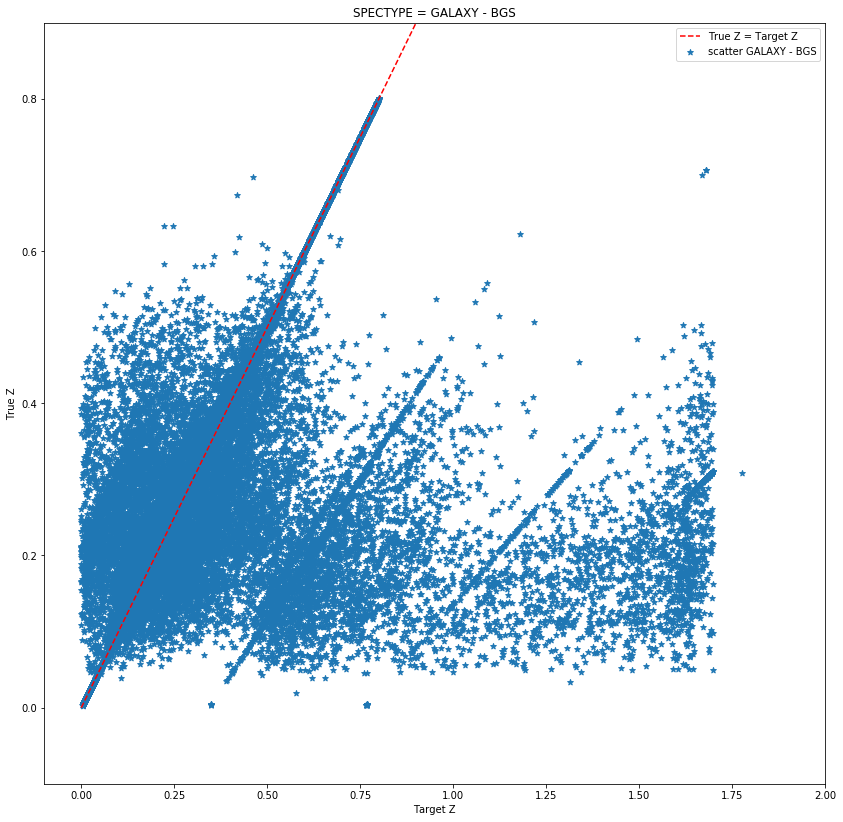

In [20]:
#Relacion entre TARGET Z y TRUE Z para SPECTYPE= GALAXY - TYPE BGS . 
x_f = linspace(0, 4.0, 100)

fig, ax = subplots(figsize=(14, 14))
ax.plot(x_f, x_f, '--', color='r')
ax.scatter( BGS_file_tar[1]['Z'][:], BGS_file_true[1]['TRUEZ'][:],marker='*')
ax.legend(('True Z = Target Z', 'scatter GALAXY - BGS'))
ax.set_ylabel('True Z')
ax.set_xlabel('Target Z')
ax.set_title('SPECTYPE = GALAXY - BGS')
ax.set_xlim(-0.1, 2.0)
ax.set_ylim(-0.1, 0.9)

(-0.1, 2.0)

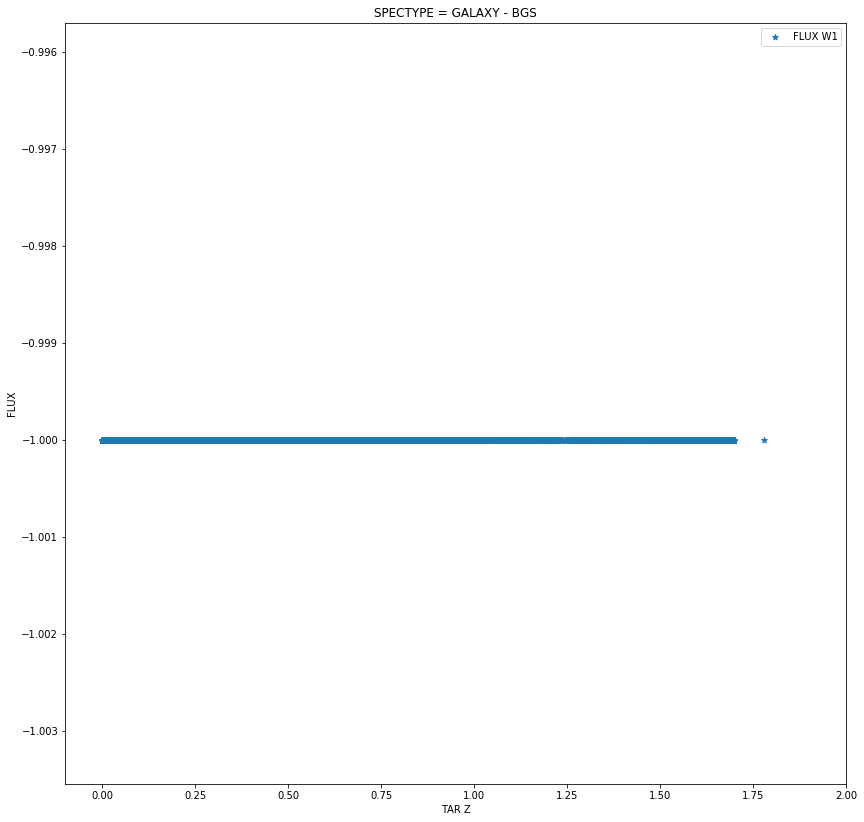

In [46]:
# Vamos a ver por qué se forman esos subgrupos. 

fig, ax = subplots(figsize=(14, 14))
ax.scatter(BGS_file_tar[1]['Z'][:], BGS_file_true[1]['LOGG'][:], marker='*')

#ax.scatter(BGS_file_tar[1]['Z'][:], BGS_file_tar[1]['FLUX_R'][:], marker='*', color='g')

#ax.scatter(BGS_file_tar[1]['Z'][:], BGS_file_tar[1]['FLUX_W2'][:], marker='*', color='B')


ax.legend(('FLUX W1', 'FLUX W2', 'FLUX Z'))
ax.set_xlabel('TAR Z')
ax.set_ylabel('FLUX')
ax.set_title('SPECTYPE = GALAXY - BGS')
ax.set_xlim(-0.1, 2.0)
#ax.set_ylim(-0.1, 2.0)

In [54]:
#MIRA LO QUE ENCONTRE!!!!!! 
# https://desidatamodel.readthedocs.io/en/latest/DESI_TARGET/mtl.html
# LA DESCRIPCION DE LOS DATOS!!! 
# G, R Y Z SON BANDAS ÓPTICAS. 

# Focus. mi primer objetivo es hacer que la grafica de arriba esté toda sobre la diagonal. 
#https://github.com/desihub/tutorials
# I think I will start using astropy.
#

In [128]:
brickID_group = []
for br_id in BGS_file_tar[1]['BRICKID'][:]:
    brickID_group.append(int(str(br_id)[0:3]))

brickID_group = array(brickID_group)

In [131]:
#unique brick ID groups:
unique(brickID_group)

array([235, 236, 238, 239, 240, 242, 243, 245, 246, 247, 249, 250, 252,
       253, 254, 255, 256, 257, 258, 259, 260, 261, 263, 264, 265, 266,
       267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279,
       280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292,
       293, 294, 296, 297, 298, 300, 301, 303, 304, 306, 307, 308, 309,
       310, 311, 313, 314, 316, 317, 318, 319, 320, 321, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 346, 347, 348, 349, 350, 351, 352,
       353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365,
       366, 367, 368, 369, 370, 371, 372, 373, 374, 376, 377, 379, 380,
       381, 382, 383, 384, 385, 386, 387, 389, 390, 391, 392, 393, 394,
       396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408,
       409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421,
       422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 43

In [79]:
obs_conds_4 = []
obs_conds_7 = []

for i, obs in enumerate(BGS_file_tar[1]['OBSCONDITIONS'][:]):
    if obs == 4:
        obs_conds_4.append([BGS_file_true[1]['TRUEZ'][i][0], BGS_file_tar[1]['Z'][i][0]])
    elif obs == 7:
        obs_conds_7.append([BGS_file_true[1]['TRUEZ'][i][0], BGS_file_tar[1]['Z'][i][0]])


In [106]:
obs_conds_4 = array(obs_conds_4)
obs_conds_7 = array(obs_conds_7)

(-0.1, 1.0)

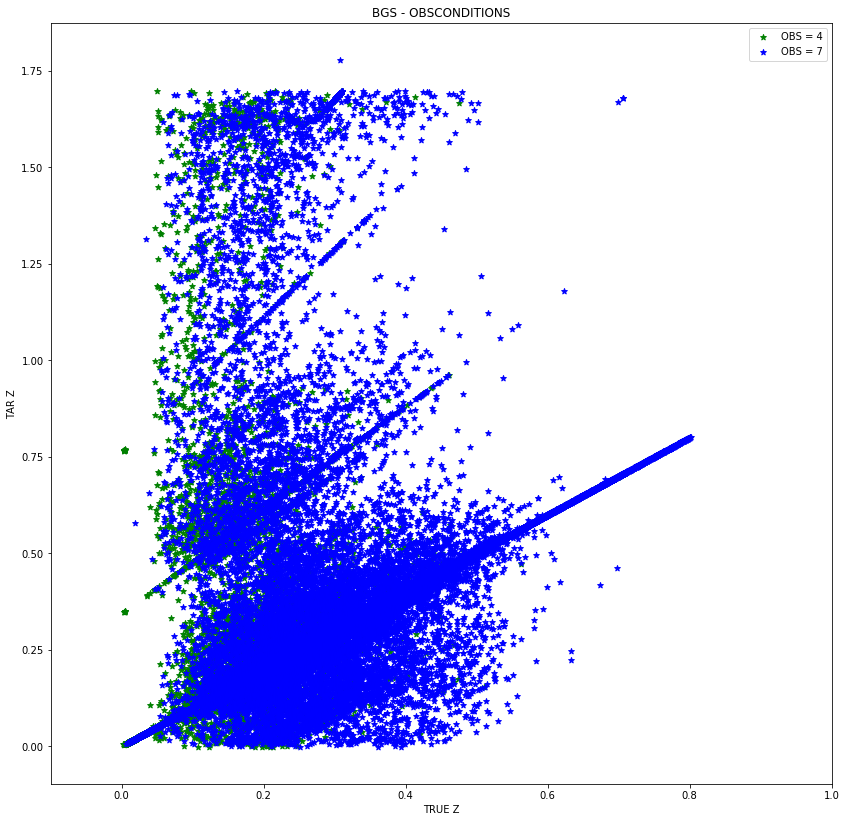

In [111]:
fig, ax = subplots(figsize=(14, 14))

ax.scatter(obs_conds_4[:,0],obs_conds_4[:,1], marker='*', color='g')

ax.scatter(obs_conds_7[:,0],obs_conds_7[:,1], marker='*', color='B')


ax.legend(('OBS = 4', 'OBS = 7'))
ax.set_xlabel('TRUE Z')
ax.set_ylabel('TAR Z')
ax.set_title('BGS - OBSCONDITIONS')
ax.set_xlim(-0.1, 1.0)
#ax.set_ylim(-0.1, 2.0)

In [155]:
# subdivide by brick group, 2xx, 3xx, 4xx, 5xx, 6xx. 
#color = [b, g, r, c, m]
plot_by_brick_group_2 = []
plot_by_brick_group_3 = []
plot_by_brick_group_4 = []
plot_by_brick_group_5 = []
plot_by_brick_group_6 = []

for i, group in enumerate(brickID_group):
    if group//100 == 2:
        plot_by_brick_group_2.append([BGS_file_true[1]['TRUEZ'][i][0], BGS_file_tar[1]['Z'][i][0]])
    elif group//100 == 3:
        plot_by_brick_group_3.append([BGS_file_true[1]['TRUEZ'][i][0], BGS_file_tar[1]['Z'][i][0]])
    elif group//100 == 4:
        plot_by_brick_group_4.append([BGS_file_true[1]['TRUEZ'][i][0], BGS_file_tar[1]['Z'][i][0]])
    elif group//100 == 5:
        plot_by_brick_group_5.append([BGS_file_true[1]['TRUEZ'][i][0], BGS_file_tar[1]['Z'][i][0]])
    elif group//100 == 6:
        plot_by_brick_group_6.append([BGS_file_true[1]['TRUEZ'][i][0], BGS_file_tar[1]['Z'][i][0]])
    
plot_by_brick_group_2 = array(plot_by_brick_group_2)
plot_by_brick_group_3 = array(plot_by_brick_group_3)
plot_by_brick_group_4 = array(plot_by_brick_group_4)
plot_by_brick_group_5 = array(plot_by_brick_group_5)
plot_by_brick_group_6 = array(plot_by_brick_group_6)


In [157]:
print(len(brickID_group))
print(len(plot_by_brick_group_2)+len(plot_by_brick_group_3)+len(plot_by_brick_group_4)+len(plot_by_brick_group_5)+len(plot_by_brick_group_6))

889336
889336


(-0.1, 1.0)

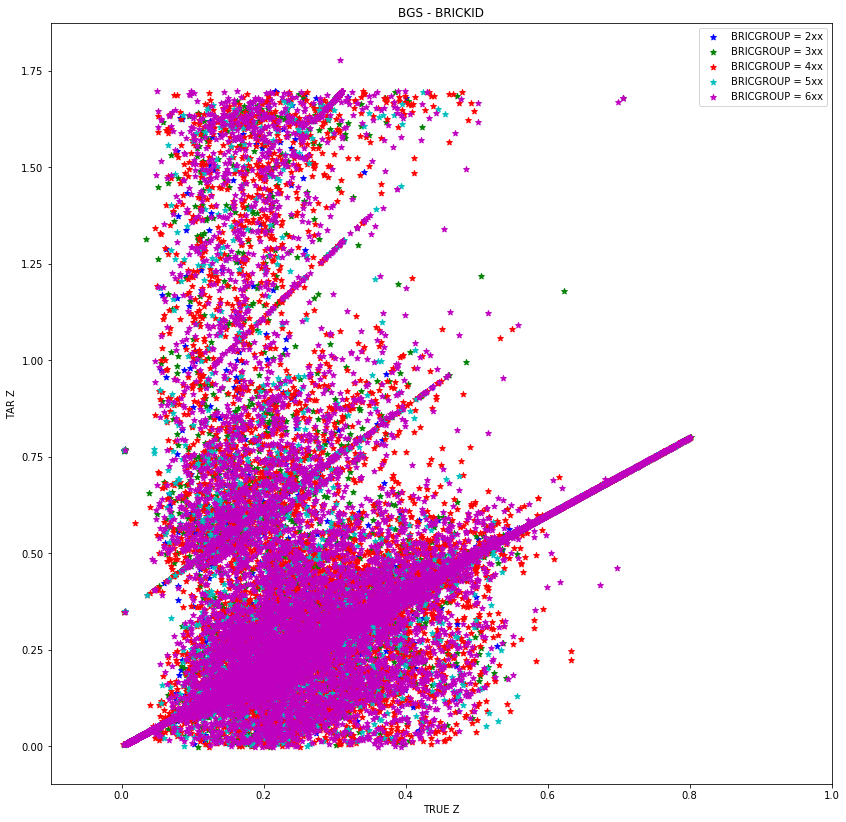

In [158]:
fig, ax = subplots(figsize=(14, 14))

ax.scatter(plot_by_brick_group_2[:,0],plot_by_brick_group_2[:,1], marker='*', color='b')

ax.scatter(plot_by_brick_group_3[:,0],plot_by_brick_group_3[:,1], marker='*', color='g')

ax.scatter(plot_by_brick_group_4[:,0],plot_by_brick_group_4[:,1], marker='*', color='r')

ax.scatter(plot_by_brick_group_5[:,0],plot_by_brick_group_5[:,1], marker='*', color='c')

ax.scatter(plot_by_brick_group_6[:,0],plot_by_brick_group_6[:,1], marker='*', color='m')

ax.legend(('BRICGROUP = 2xx', 'BRICGROUP = 3xx', 'BRICGROUP = 4xx', 'BRICGROUP = 5xx', 'BRICGROUP = 6xx'))
ax.set_xlabel('TRUE Z')
ax.set_ylabel('TAR Z')
ax.set_title('BGS - BRICKID')
ax.set_xlim(-0.1, 1.0)

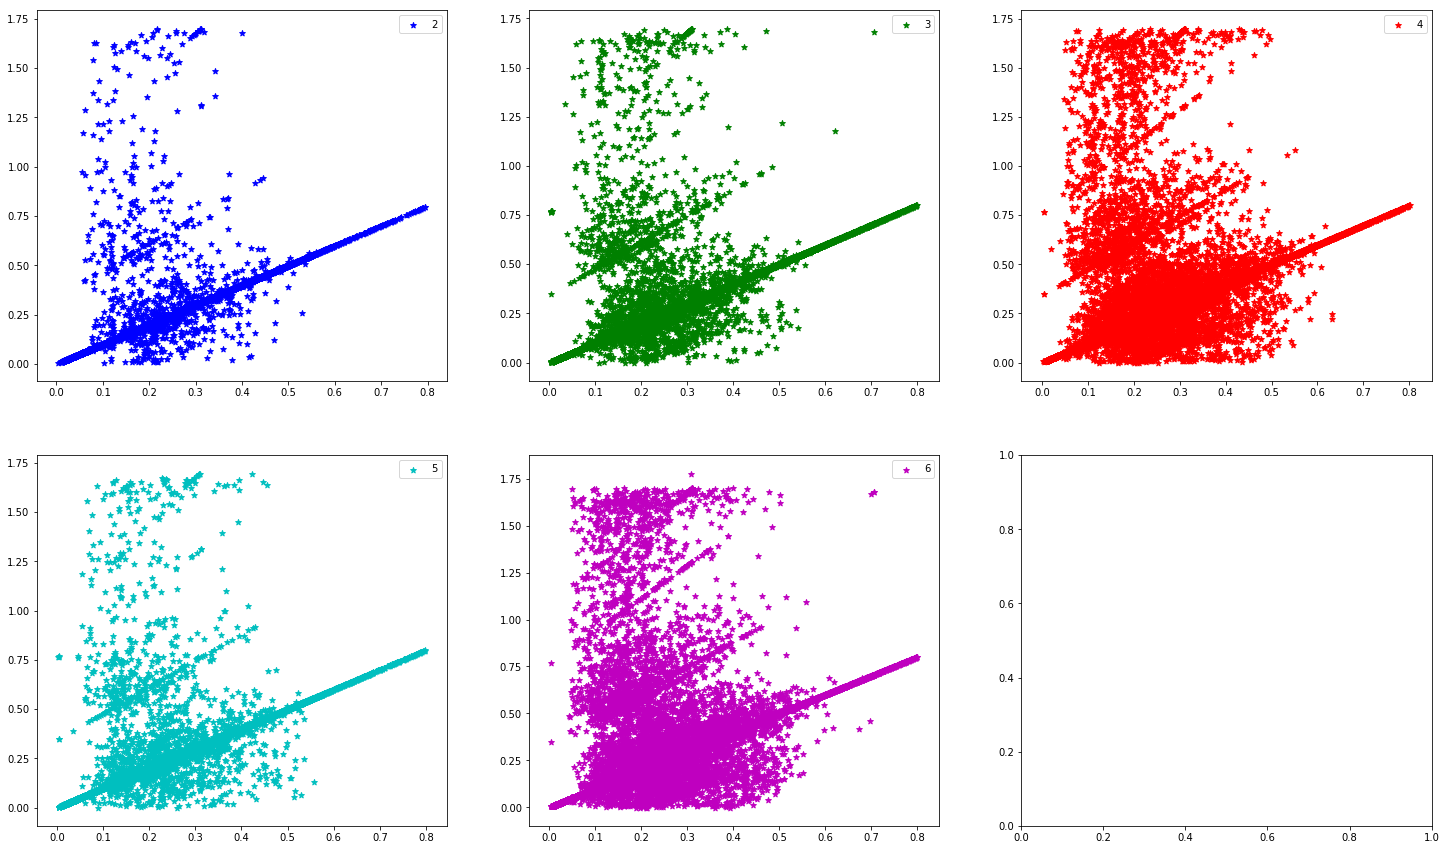

In [172]:
fig, ax = subplots(2,3, figsize=(25,15))
ax[0, 0].scatter(plot_by_brick_group_2[:,0],plot_by_brick_group_2[:,1], marker='*', color='b')

ax[0, 1].scatter(plot_by_brick_group_3[:,0],plot_by_brick_group_3[:,1], marker='*', color='g')

ax[0, 2].scatter(plot_by_brick_group_4[:,0],plot_by_brick_group_4[:,1], marker='*', color='r')

ax[1, 0].scatter(plot_by_brick_group_5[:,0],plot_by_brick_group_5[:,1], marker='*', color='c')

ax[1, 1].scatter(plot_by_brick_group_6[:,0],plot_by_brick_group_6[:,1], marker='*', color='m')

ax[0, 0].legend(('2'))
ax[0, 1].legend('3')
ax[0, 2].legend('4')
ax[1, 0].legend('5')
ax[1, 1].legend('6')